![example](images/director_shot.jpeg)

# Project Title

**Authors:** Student 1, Student 2, Student 3
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [71]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gzip
import json
import requests
import re
from bs4 import BeautifulSoup
%matplotlib inline

In [72]:
# more data
tn_moviebudgets = pd.read_csv('tn.movie_budgets.csv.gz')
tm_movies = pd.read_csv('tmdb.movies.csv.gz')
rt_reviews = pd.read_csv('rt.reviews.tsv.gz', compression='gzip',
                   error_bad_lines=False, sep="\t", encoding = 'latin-1')
rt_movieinfo = pd.read_csv('rt.movie_info.tsv.gz', compression='gzip',
                   error_bad_lines=False, sep="\t", encoding = 'latin-1')
imdb_title_princ = pd.read_csv('imdb.title.principals.csv.gz')
imdb_title_crew = pd.read_csv('imdb.title.crew.csv.gz')
imdb_title_akas = pd.read_csv('imdb.title.akas.csv.gz')
imdb_name_basics = pd.read_csv('imdb.name.basics.csv.gz')

In [73]:
#main data
imdb_title_ratings = pd.read_csv('imdb.title.ratings.csv.gz')
imdb_title_basics = pd.read_csv('imdb.title.basics.csv.gz')
bom_movie_gross = pd.read_csv('bom.movie_gross.csv.gz')

In [4]:
imdb_title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [5]:
imdb_title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [6]:
imdb_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [ ]:
#Join imdb_title_basics and imdb_title_ratings 

In [7]:
primary_title = imdb_title_basics['primary_title']

In [69]:
imdb_ratings_joined = imdb_title_basics.merge(imdb_title_ratings, on = 'tconst',  how = 'outer')
imdb_ratings_joined.sort_values(by = 'start_year', ascending = False)
#goes up to 2115 lmao 
#ratings and title and const

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
89506,tt5174640,100 Years,100 Years,2115,NaN,Drama,NaN,NaN
96592,tt5637536,Avatar 5,Avatar 5,2027,NaN,"Action,Adventure,Fantasy",NaN,NaN
2949,tt10300398,Untitled Star Wars Film,Untitled Star Wars Film,2026,NaN,Fantasy,NaN,NaN
52213,tt3095356,Avatar 4,Avatar 4,2025,NaN,"Action,Adventure,Fantasy",NaN,NaN
105187,tt6149054,Fantastic Beasts and Where to Find Them 5,Fantastic Beasts and Where to Find Them 5,2024,NaN,"Adventure,Family,Fantasy",NaN,NaN
...,...,...,...,...,...,...,...,...
74712,tt4264626,Civil War Life: Shot to Pieces,Civil War Life: Shot to Pieces,2010,79.0,Documentary,5.7,6.0
14471,tt1716746,Heinrich Kieber - Datendieb,Heinrich Kieber - Datendieb,2010,52.0,Documentary,7.7,6.0
74692,tt4263706,Mushrooms of America,Mushrooms of America,2010,46.0,"Adventure,Comedy,Documentary",NaN,NaN
118065,tt7059624,Zamana,Zamana,2010,140.0,Drama,NaN,NaN


In [9]:
bom_movie_gross.info()
#box office mojo movie gross info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [64]:
bom_movie_gross.sort_values(by='year', ascending=False)
#last year is 2018
#includes studio

,title,studio,domestic_gross,foreign_gross,year
3386,An Actor Prepares,Grav.,1700.0,NaN,2018
3183,On the Basis of Sex,Focus,24600000.0,13600000,2018
3176,Tyler Perry's Acrimony,LGF,43500000.0,2900000,2018
3177,Mary Queen of Scots,Focus,16500000.0,29900000,2018
3178,The Possession of Hannah Grace,SGem,14800000.0,28200000,2018
...,...,...,...,...,...
220,After.Life,Anch.,109000.0,1900000,2010
221,Cairo Time,IFC,1600000.0,391000,2010
222,Flipped,WB,1800000.0,NaN,2010
223,Guzaarish,UTV,1000000.0,695000,2010


In [11]:
tm_movies.info()
tm_movies.sort_values(by='release_date')
#weird unnamed column, get rid of that
#popularity, title, rating, 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
14335,14335,"[18, 10752]",143,en,All Quiet on the Western Front,9.583,1930-04-29,All Quiet on the Western Front,7.8,299
21758,21758,"[27, 53]",43148,en,The Vampire Bat,2.292,1933-01-21,The Vampire Bat,5.6,23
3580,3580,"[35, 18, 10749]",263768,fr,Le Bonheur,1.653,1936-02-27,Le Bonheur,8.7,3
26345,26345,[],316707,en,How Walt Disney Cartoons Are Made,0.600,1939-01-19,How Walt Disney Cartoons Are Made,7.3,3
11192,11192,"[18, 36, 10749]",887,en,The Best Years of Our Lives,9.647,1946-12-25,The Best Years of Our Lives,7.8,243
...,...,...,...,...,...,...,...,...,...,...
24819,24819,[18],481880,en,Trial by Fire,4.480,2019-05-17,Trial by Fire,7.0,3
24003,24003,"[18, 9648, 53]",411144,en,We Have Always Lived in the Castle,14.028,2019-05-17,We Have Always Lived in the Castle,5.2,24
24892,24892,[99],541577,en,This Changes Everything,3.955,2019-06-28,This Changes Everything,0.0,1
24265,24265,"[10749, 18]",428836,en,Ophelia,8.715,2019-06-28,Ophelia,0.0,4


In [12]:
tn_moviebudgets.info()
tn_moviebudgets['release_date'] = pd.to_datetime(tn_moviebudgets['release_date'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [70]:
tn_moviebudgets.sort_values(by='id')
#good for production budget and movie name 

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
5200,1,2003-05-14,Dracula: Pages from a Virgin's Diary,"$1,100,000","$39,659","$81,371"
2500,1,1978-06-16,Jaws 2,"$20,000,000","$102,922,376","$208,900,376"
4200,1,2011-03-18,Winter in Wartime,"$5,800,000","$542,860","$9,662,214"
2400,1,1987-06-24,Spaceballs,"$22,700,000","$38,119,483","$38,119,483"
...,...,...,...,...,...,...
3899,100,2015-06-12,Me and Earl and the Dying Girl,"$8,000,000","$6,758,416","$9,266,180"
299,100,2005-07-22,The Island,"$120,000,000","$35,818,913","$163,018,913"
699,100,1996-11-08,Ransom,"$70,000,000","$136,492,681","$308,700,000"
799,100,2004-12-08,Blade: Trinity,"$65,000,000","$52,397,389","$131,353,165"


In [14]:
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [62]:
rt_reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [80]:
rt_movieinfo['theater_date'] = pd.to_datetime(rt_movieinfo['theater_date'])
rt_movieinfo['dvd_date'] = pd.to_datetime(rt_movieinfo['dvd_date'])
# get info from 2005 forward
# change date columns to datetime format
rt_movieinfo.sort_values(by = 'theater_date', ascending = False)
#stops at 2018 

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
973,1264,The Super centers on the mysterious disappeara...,R,Mystery and Suspense,Stephan Rick,NaN,2018-10-19,2018-12-18,NaN,NaN,90 minutes,NaN
813,1050,In the tradition of Amblin classics where fant...,PG,Comedy|Kids and Family|Science Fiction and Fan...,Eli Roth,Eric Kripke,2018-09-21,2018-11-27,NaN,NaN,104 minutes,Universal Pictures
1023,1325,From the outer reaches of space to the small-t...,R,Action and Adventure|Horror|Science Fiction an...,Shane Black,Shane Black|Fred Dekker,2018-09-14,2018-11-27,NaN,NaN,NaN,NaN
102,131,No Sesame. All Street. THE HAPPYTIME MURDERS i...,R,Action and Adventure|Comedy,Brian Henson,Todd Berger|Dee Austin Robertson,2018-08-24,2018-12-04,NaN,NaN,NaN,STXfilms
1430,1845,A group of wealthy boys in Los Angeles during ...,R,Drama|Mystery and Suspense,James Cox,Captain Mauzner|James Cox,2018-08-17,2018-09-18,NaN,NaN,100 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1543,1982,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
1547,1987,Patrick Dempsey stars in this biography of Son...,PG-13,Comedy,Phil Alden Robinson,Phil Alden Robinson,NaT,NaT,NaN,NaN,98 minutes,NaN
1548,1988,When the money-hungry Duke Stuyvesant (Sterlin...,R,Comedy,Les Rose,NaN,NaT,NaT,NaN,NaN,94 minutes,NaN
1549,1989,Hungarian Rhapsody (Magyar Rapszodia) is the f...,NR,Art House and International|Drama,NaN,NaN,NaT,NaT,NaN,NaN,101 minutes,NaN


In [60]:
rt_movieinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1560 non-null   int64  
 1   synopsis      1498 non-null   object 
 2   rating        1557 non-null   object 
 3   genre         1552 non-null   object 
 4   director      1361 non-null   object 
 5   writer        1111 non-null   object 
 6   theater_date  1201 non-null   object 
 7   dvd_date      1201 non-null   object 
 8   currency      340 non-null    object 
 9   box_office    340 non-null    float64
 10  runtime       1530 non-null   object 
 11  studio        494 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 146.4+ KB


In [16]:
rt_joined = rt_movieinfo.merge(rt_reviews, on = 'id', how = 'outer')
rt_joined

rt_joined_studios = rt_joined['studio'].value_counts()
rt_joined_studios.tolist()
rt_joined_studios
pd.DataFrame(rt_joined_studios)

,studio
Universal Pictures,4423
Paramount Pictures,3142
20th Century Fox,2418
Sony Pictures,2135
Sony Pictures Classics,2096
...,...
Grindstone Entertainment,1
After Dark Films/Freestyle Releasing,1
Cinema Service,1
FilmDistrict,1


In [81]:
rt_joined

,id,synopsis,rating_x,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,review,rating_y,fresh,critic,top_critic,publisher,date
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0.0,Patrick Nabarro,"November 10, 2018"
2,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0.0,io9.com,"May 23, 2018"
3,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0.0,Stream on Demand,"January 4, 2018"
4,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0.0,MUBI,"November 16, 2017"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54852,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1.0,Village Voice,"September 24, 2002"
54853,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures,NaN,1/5,rotten,Michael Szymanski,0.0,Zap2it.com,"September 21, 2005"
54854,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures,NaN,2/5,rotten,Emanuel Levy,0.0,EmanuelLevy.Com,"July 17, 2005"
54855,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures,NaN,2.5/5,rotten,Christopher Null,0.0,Filmcritic.com,"September 7, 2003"


In [36]:
rt_movieinfo.dtypes

id               int64
synopsis        object
rating          object
genre           object
director        object
writer          object
theater_date    object
dvd_date        object
currency        object
box_office      object
runtime         object
studio          object
dtype: object

In [83]:
rt_movieinfo['box_office'] = rt_movieinfo['box_office'].str.replace(',',"")

In [84]:
rt_movieinfo['box_office'] = rt_movieinfo['box_office'].astype(float) 

Text(0.5, 0, 'Average revenue in 100s of millions')

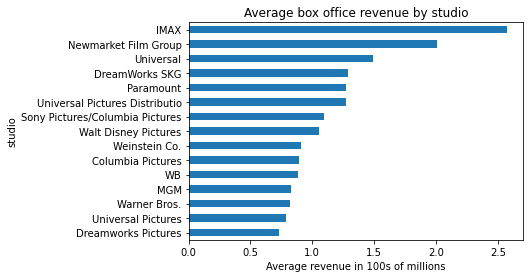

In [85]:
(rt_movieinfo.groupby(['studio'])['box_office'].mean().sort_values(ascending = False).head(15)/100000000).plot(kind = 'barh')
plt.title('Average box office revenue by studio')
plt.gca().invert_yaxis()
plt.xlabel('Average revenue in 100s of millions')

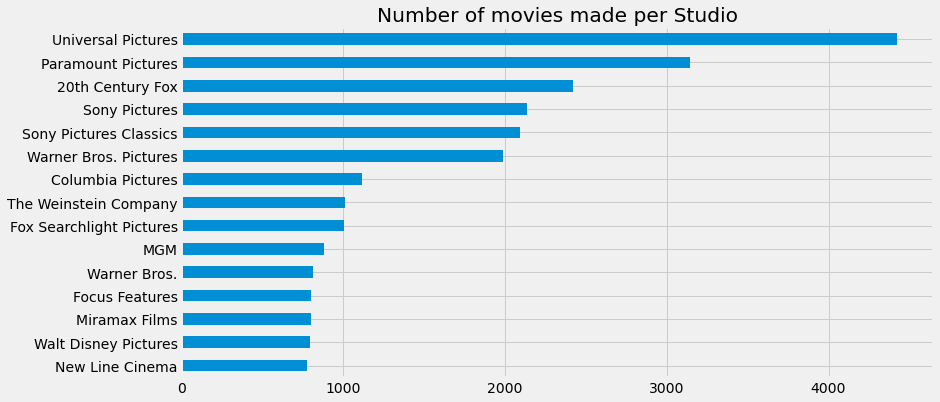

In [35]:
with plt.style.context("fivethirtyeight"):
    rt_joined['studio'].value_counts().head(15).plot(kind = 'barh', figsize = (12,6))
    plt.title('Number of movies made per Studio')
    plt.gca().invert_yaxis()

In [17]:
imdb_title_princ.info()
imdb_title_princ.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   tconst      1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   nconst      1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [18]:
imdb_title_crew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     146144 non-null  object
 1   directors  140417 non-null  object
 2   writers    110261 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


In [19]:
imdb_name_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


In [20]:
imdbcast_crew = imdb_title_princ.merge(imdb_name_basics, on = 'nconst', how = 'outer')
imdbcast_crew = imdbcast_crew.sort_values(by = 'tconst')
imdbcast_crew = imdbcast_crew.merge(imdb_title_crew, on = 'tconst', how = 'outer')
imdbcast_crew

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles,directors,writers
0,tt0063540,3.0,nm0756379,actor,NaN,"[""Ganeshi N. Prasad""]",Balraj Sahni,1913.0,1973.0,"actor,writer,director","tt0055039,tt0043307,tt0234827,tt0233326",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276"
1,tt0063540,7.0,nm1194313,writer,story,NaN,Mahasweta Devi,1926.0,2016.0,writer,"tt0108001,tt0832902,tt0063540,tt0178562",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276"
2,tt0063540,9.0,nm1391276,writer,screenplay,NaN,Anjana Rawail,NaN,NaN,"writer,costume_designer","tt0293499,tt0266712,tt0266757,tt0063540",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276"
3,tt0063540,6.0,nm0023551,writer,dialogue,NaN,Abrar Alvi,1927.0,2009.0,"writer,actor,director","tt0071811,tt0359496,tt0056436,tt0061046",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276"
4,tt0063540,8.0,nm0347899,writer,dialogue,NaN,Gulzar,1936.0,NaN,"music_department,writer,soundtrack","tt0091256,tt0178186,tt1010048,tt2176013",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033229,tt7659080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nm6474441,NaN
1033230,tt7763158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1033231,tt7980000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1033232,tt8352852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Here you run your code to explore the data

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [22]:
# Here you run your code to clean the data

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [23]:
# Here you run your code to model the data


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***